     Sensor1    Sensor2    Sensor3  OperatingTime  Failure
0  42.472407  17.405317  45.702341     705.432695        1
1  77.042858  31.676038  44.818728     817.013258        1
2  63.919637  44.917833  84.375275     325.421109        1
3  55.919509  39.288995  44.972772     662.386690        0
4  29.361118  42.262446  46.316984     614.571385        0
Missing values:
 Sensor1          0
Sensor2          0
Sensor3          0
OperatingTime    0
Failure          0
dtype: int64


<ipython-input-1-cd10c3255238>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill for simplicity



Model Accuracy: 91.00%

Confusion Matrix:
 [[84  3]
 [15 98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        87
           1       0.97      0.87      0.92       113

    accuracy                           0.91       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.91      0.91       200



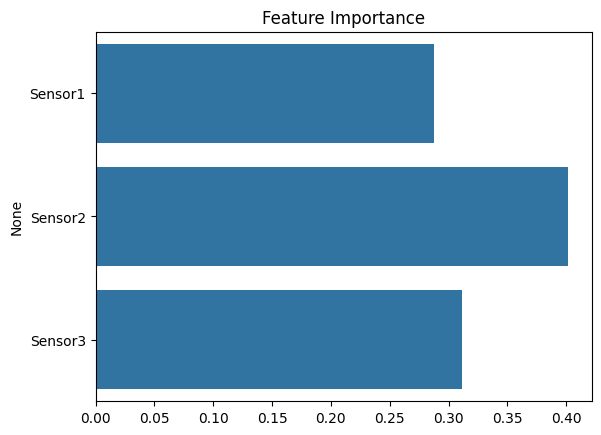

['predictive_maintenance_model.pkl']

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset using the absolute path
data = pd.read_csv('predictive maintenance data.csv')

# Displaying the first few rows of the dataset
print(data.head())

# Check for missing values and handle them
print("Missing values:\n", data.isnull().sum())
data.fillna(method='ffill', inplace=True)  # Forward fill for simplicity

# Feature engineering
X = data[['Sensor1', 'Sensor2', 'Sensor3']]#S1:Vibration/Temperature,S2: blockages,S3:imbalanced rotating parts
y = data['Failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building
# Using Random Forest Classifier for this example
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
print("\nModel Accuracy: {:.2f}%".format(accuracy))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance visualization
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

# Save the model (optional)
import joblib
joblib.dump(model, 'predictive_maintenance_model.pkl')


In [2]:
!pip install gradio
import gradio as gr
import joblib
import numpy as np

# Load the trained model
model = joblib.load('predictive_maintenance_model.pkl')

# Function to test the model
def test_model(sensor1, sensor2, sensor3):
    input_data = np.array([[sensor1, sensor2, sensor3]])  # Convert input to 2D array
    prediction = model.predict(input_data)  # Get prediction
    if prediction[0] == 1:
        return "<div style='background-color:#D32F2F; color:white; padding:20px; border-radius:10px;'>🚨 Failure Expected</div>"  # Dark Red background for failure
    else:
        return "<div style='background-color:#388E3C; color:white; padding:20px; border-radius:10px;'>✅ No Failure Expected</div>"  # Dark Green background for no failure

# Create a Gradio interface
def create_interface():
    # Define the interface with custom styles
    with gr.Blocks() as demo:
        # Adding a custom background to the whole container
        gr.HTML("""
<style>
                .gradio-container {
                    background-color: #2C3E50;  /* Dark Blue-Gray background for the whole app */
                    font-family: 'Arial', sans-serif;
                    padding: 20px;
                    border-radius: 15px;
                    box-shadow: 0 4px 15px rgba(0, 0, 0, 0.1);
                }

                .gr-markdown h1 {
                    font-size: 36px;
                    font-weight: bold;
                    color: #ECF0F1;  /* Light gray text for header */
                    text-align: center;
                }

                .gr-markdown h3 {
                    font-size: 20px;
                    text-align: center;
                    color: #BDC3C7;  /* Lighter gray text for subheading */
                    margin-bottom: 20px;
                }

                .gr-number-input {
                    background-color: #34495E;  /* Dark Gray background for input fields */
                    border-radius: 8px;
                    padding: 10px;
                    width: 100%;
                    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
                    font-size: 16px;
                    margin-bottom: 20px;
                    color: white;
                }

                /* Button styling */
                #predict_button {
                    background-color: #27AE60;
                    color: white;
                    font-weight: bold;
                    border-radius: 8px;
                    width: 100%;
                    padding: 15px;
                    margin-top: 20px;
                    font-size: 18px;
                    cursor: pointer;
                    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
                    transition: background-color 0.3s, transform 0.2s;
                }

                #predict_button:hover {
                    background-color: #2ECC71;
                    transform: scale(1.05);
                }

                .gr-html {
                    font-size: 20px;
                    font-weight: bold;
                    text-align: center;
                    padding: 20px;
                    border-radius: 10px;
                    margin-top: 20px;
                    transition: background-color 0.3s;
                    color: white;
                    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
                }
</style>
        """)

        gr.Markdown("# **Predictive Maintenance Model**")
        gr.Markdown("### Enter sensor values to predict machine failure.")
        # Define input fields for sensor values
        with gr.Row():
            sensor1_input = gr.Number(label="Sensor 1 Value", value=10.5)
            sensor2_input = gr.Number(label="Sensor 2 Value", value=20.3)
            sensor3_input = gr.Number(label="Sensor 3 Value", value=15.8)
        # Define the output field for prediction
        output_text = gr.HTML(label="Prediction")  # HTML component to display colored output
        # Create a button for triggering the prediction
        btn_predict = gr.Button("Predict Failure", elem_id="predict_button")
        # Link the button to the prediction function
        btn_predict.click(fn=test_model, inputs=[sensor1_input, sensor2_input, sensor3_input], outputs=[output_text])

    # Launch the interface
    demo.launch()

# Run the Gradio interface
create_interface()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1f37f66b3c0ffca18c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/sp

In [ ]:
import joblib
import numpy as np

# Load the trained model
model = joblib.load('predictive_maintenance_model.pkl')

# Function to test the model
def test_model(sensor1, sensor2, sensor3):
    input_data = np.array([[sensor1, sensor2, sensor3]])  # Convert input to 2D array
    prediction = model.predict(input_data)  # Get prediction
    return "Failure Expected" if prediction[0] == 1 else "No Failure Expected"

# Test with example inputs
test_cases = [
    (10.5, 20.3, 15.8),  # Example case 1
    (5.1, 18.7, 12.3),   # Example case 2
    (22.0, 30.5, 25.0),  # Example case 3
]

print("Testing the Predictive Maintenance Model:\n")
for i, (s1, s2, s3) in enumerate(test_cases):
    result = test_model(s1, s2, s3)
    print(f"Test Case {i+1}: Sensor1={s1}, Sensor2={s2}, Sensor3={s3} --> {result}")


Testing the Predictive Maintenance Model:

Test Case 1: Sensor1=10.5, Sensor2=20.3, Sensor3=15.8 --> No Failure Expected
Test Case 2: Sensor1=5.1, Sensor2=18.7, Sensor3=12.3 --> Failure Expected
Test Case 3: Sensor1=22.0, Sensor2=30.5, Sensor3=25.0 --> No Failure Expected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
